## Important Libraries

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Dataset

In [28]:
#Loading csv_file to jupyter notebook
df = pd.read_csv(r"C:\Users\ftc\Downloads\combined.csv")

## Data Exploration

In [29]:
#Display top 5 Rows of Data
df.head()

,Sample_ID,Dipole_moment,Hyperpolarizability,Polarizability,Energy_Gap,Cohesive,Solu,Solu_vdw,Solu_ele,mol_MR,...,Hole Extraction Potential (eV),T1 Vertical Absorption (eV),S3 at S0 (eV),Scaled Gap (eV),T1S0 RMSD (Angstrom),Electron Vertical Ionization Energy (eV),Hole Neutral Stabilization Energy (ev),S2 at S0 (eV),S1-T3 Gap (eV),r33
0,HF7113,23.3336,324.6454,119.6163,2.1990,48.6409,16.7807,15.1289,7.2598,216.105,...,6.386951,1.598923,3.269600,1.947375,1.989270e-15,-1.892298,0.000094,3.189459,-0.545081,29.0
1,HF7114,26.6969,1084.7672,145.3139,1.8868,53.2941,17.7026,16.1087,7.3410,217.056,...,6.202661,1.432881,3.166616,1.701854,8.035662e-16,-2.086024,0.000295,2.913557,-0.521389,36.0
2,HF7143,22.2384,1114.9833,135.0001,1.9140,54.4759,17.2286,15.9818,6.4347,229.389,...,6.113581,1.569121,3.251643,1.809858,2.653580e-15,-1.832450,0.035662,2.955168,-0.468662,27.6
3,HF7148,29.4337,1341.4246,163.4298,1.8681,57.3599,17.7137,16.3655,6.7779,237.332,...,6.025733,1.470514,2.924616,1.703588,3.678080e-15,-1.958438,0.000112,2.122486,-0.228628,91.0
4,HF7152,23.6765,277.9581,119.8306,2.3056,52.8829,17.5902,15.9208,7.4795,225.744,...,6.345848,1.698388,3.137234,1.860453,1.652186e-15,-1.869389,0.030997,2.724878,-0.548738,22.0


In [30]:
#Display some relevent information to data and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 93 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Sample_ID                                         136 non-null    object 
 1   Dipole_moment                                     136 non-null    float64
 2   Hyperpolarizability                               136 non-null    float64
 3   Polarizability                                    136 non-null    float64
 4   Energy_Gap                                        136 non-null    float64
 5   Cohesive                                          136 non-null    float64
 6   Solu                                              136 non-null    float64
 7   Solu_vdw                                          136 non-null    float64
 8   Solu_ele                                          136 non-null    float64
 9   mol_MR               

In [31]:
#show count, mean, standard deviation, min, max value etc
df.describe()

,Dipole_moment,Hyperpolarizability,Polarizability,Energy_Gap,Cohesive,Solu,Solu_vdw,Solu_ele,mol_MR,Kappa1,...,Hole Extraction Potential (eV),T1 Vertical Absorption (eV),S3 at S0 (eV),Scaled Gap (eV),T1S0 RMSD (Angstrom),Electron Vertical Ionization Energy (eV),Hole Neutral Stabilization Energy (ev),S2 at S0 (eV),S1-T3 Gap (eV),r33
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,...,136.000000,136.000000,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,136.000000
mean,26.448155,1077.776877,178.584279,1.907399,61.294641,16.761690,15.562346,6.192920,285.034195,16.526236,...,6.121589,1.594537,2.761236,1.755256,1.874421e-15,-2.005366,0.013952,2.336345,-0.385447,86.217279
std,3.139288,420.826464,29.679263,0.191595,7.329944,0.970849,0.769100,0.875899,49.251457,3.312962,...,0.188896,0.124385,0.314538,0.158303,1.294555e-15,0.178968,0.026123,0.402016,0.179112,40.508083
min,8.020100,57.968100,98.660200,1.386100,43.859200,14.511000,13.692000,4.805800,169.425000,8.627796,...,5.586976,1.287157,1.876697,1.313301,3.796756e-16,-2.404547,-0.062102,1.587473,-0.824034,16.800000
25%,25.517800,886.841050,161.516200,1.814525,55.726750,16.078475,15.049250,5.417175,242.947500,14.447935,...,6.019360,1.529164,2.594369,1.666313,1.259726e-15,-2.103039,0.000099,2.070311,-0.516894,54.500000
50%,27.161300,1117.586000,184.254350,1.883850,62.000600,16.710950,15.516500,6.054600,294.138000,16.606720,...,6.108657,1.586562,2.746294,1.731340,1.638431e-15,-2.015871,0.001371,2.267907,-0.382331,88.000000
75%,28.103125,1280.180900,198.665050,1.925625,65.890050,17.377500,16.088575,6.748050,319.469500,18.536971,...,6.233755,1.678498,2.908319,1.810644,2.138195e-15,-1.964077,0.033591,2.477539,-0.251487,116.250000
max,35.810100,2502.518900,292.827900,2.588100,91.063300,19.775100,17.905400,8.512300,443.170000,26.779324,...,6.534405,1.955952,3.700116,2.274274,1.214866e-14,-1.354161,0.076894,3.410394,-0.001256,191.000000


## Data Cleaning or Data Preprocessing

In [32]:
#check the null values in dataset
df.isnull().sum().sum()

145

In [33]:
#check the  columns which contain how many number of null values
columns_with_null = df.columns[df.isnull().any()]
for column in columns_with_null:
    null_count = df[column].isnull().sum()
    print(f"{column}: {null_count} null values")

Emission Green Area: 29 null values
Emission Red Area: 29 null values
Emax (nm): 29 null values
Emission Blue Area: 29 null values
Stokes Shift: 29 null values


In [34]:
# Replaced null values with mean in the specified columns
columns_to_replace = ['Emission Green Area', 'Emission Red Area', 'Emax (nm)', 'Stokes Shift', 'Emission Blue Area']
for column in columns_to_replace:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

In [35]:
#Null values reduced from 145 to 0
df.isnull().sum().sum()

0

In [36]:
# Drop the ID column
df = df.drop(['Sample_ID'], axis=1)

###  Data Split with Target Column

In [37]:
# Split the dataset
# Split the dataset
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

## Low Variance Feature Elimination

In [38]:
#Specify the threshold for low variance
threshold = 0.2

# Create a VarianceThreshold object
sel = VarianceThreshold(threshold)

# Fit and transform X_train, and transform X_test
X_filtered = sel.fit_transform(x)

X = pd.DataFrame(x)


# Get the selected features
selected_features = x.columns[sel.get_support()]

# Create new DataFrames with selected features
X_filtered_df = pd.DataFrame(X_filtered, columns=selected_features)


# Get the dropped features due to low variance
dropped_features = x.columns[~sel.get_support()]

# Print or store the names of dropped features
print("Dropped features due to low variance:", list(dropped_features))

# Update X_train and X_test with only non-low variance features
X = X_filtered_df



Dropped features due to low variance: ['Energy_Gap', 'Bala', 'SMR_VSA8', 'Ecc', 'Asp', 'ISP', 'NPR1', 'NPR2', 'SI', 'MPC', 'FCSP3', 'NumD', 'Oxidation Potential (eV)', 'Reduction Potential (eV)', 'Hole Reorganization Energy (eV)', 'Electron Reorganization Energy (eV)', 'Triplet Energy (eV)', 'T1 Raw Triplet Energy (eV)', 'Hole Vertical Ionization Energy (eV)', 'Electron Neutral Stabilization Energy (ev)', 'Scaled HOMO (eV)', 'Scaled LUMO (eV)', 'Electron Extraction Potential (eV)', 'T1 Vertical Emission (eV)', 'S1 at S0 (eV)', 'Electron Small Polaron Stabilization Energy (eV)', 'Triplet Stabilization Energy (eV)', 'Electron Adiabatic Ionization Energy (ev)', 'S1-T2 Gap (eV)', 'Triplet Reorganization Energy (eV)', 'Hole Adiabatic Ionization Energy (ev)', 'Hole Small Polaron Stabilization Energy (eV)', 'S1-T1 Gap (eV)', 'Hole Extraction Potential (eV)', 'T1 Vertical Absorption (eV)', 'S3 at S0 (eV)', 'Scaled Gap (eV)', 'T1S0 RMSD (Angstrom)', 'Electron Vertical Ionization Energy (eV)', '

#### These columns have been droped due to low Variance: 
'Energy_Gap', 'Bala', 'SMR_VSA8', 'Ecc', 'Asp', 'ISP', 'NPR1', 'NPR2', 'SI', 'MPC', 'FCSP3', 'NumD', 'Oxidation Potential (eV)', 'Reduction Potential (eV)', 'Hole Reorganization Energy (eV)', 'Electron Reorganization Energy(eV)', 'Triplet Energy (eV)', 'T1 Raw Triplet Energy (eV)', 'Hole Vertical Ionization Energy (eV)', 'Electron Neutral Stabilization Energy (ev)', 'Scaled HOMO (eV)', 'Scaled LUMO (eV)', 'Electron Extraction Potential (eV)', 'T1 Vertical Emission (eV)', 'S1 at S0 (eV)', 'Electron Small Polaron Stabilization Energy (eV)', 'Triplet Stabilization Energy (eV)', 'Electron Adiabatic Ionization Energy (ev)', 'S1-T2 Gap (eV)', 'Triplet Reorganization Energy (eV)', 'Hole Adiabatic Ionization Energy (ev)', 'Hole Small Polaron Stabilization Energy (eV)', 'S1-T1 Gap (eV)', 'Hole Extraction Potential (eV)', 'T1 Vertical Absorption (eV)', 'S3 at S0 (eV)', 'Scaled Gap (eV)', 'T1S0 RMSD (Angstrom)', 'Electron Vertical Ionization Energy (eV)', 'Hole Neutral Stabilization Energy (ev)', 'S2 at S0 (eV)', 'S1-T3 Gap (eV)'

In [39]:
print("the shape of X is: ", X.shape)


the shape of X is:  (136, 49)


42 columns have been droped on the basis of low variance and columns droped from 91 to 49.

## Drop Highly Correlated Features

Groups of highly correlated features:
Cohesive and Polarizability have correlation value: 0.8978455478633759
Solu_vdw and Solu have correlation value: 0.9682264214315337
Solu_ele and Solu have correlation value: 0.8464997112634176
mol_MR and Polarizability have correlation value: 0.8810903330930708
mol_MR and Cohesive have correlation value: 0.8326290414061736
mol_MR and Solu_ele have correlation value: 0.8238379592690108
Kappa2 and Polarizability have correlation value: 0.8718745574471062
Kappa2 and Cohesive have correlation value: 0.8989855235167559
Kappa2 and mol_MR have correlation value: 0.8618817482510744
Kappa2 and Kappa1 have correlation value: 0.8844403062795261
Kappa3 and Kappa2 have correlation value: 0.9464232082557528
Chi0 and Polarizability have correlation value: 0.8312540525468575
Chi0 and Solu_ele have correlation value: 0.8758046014476194
Chi0 and mol_MR have correlation value: 0.963988803790124
Chi0 and Kappa2 have correlation value: 0.8027756209592835
Chi1 and Polar

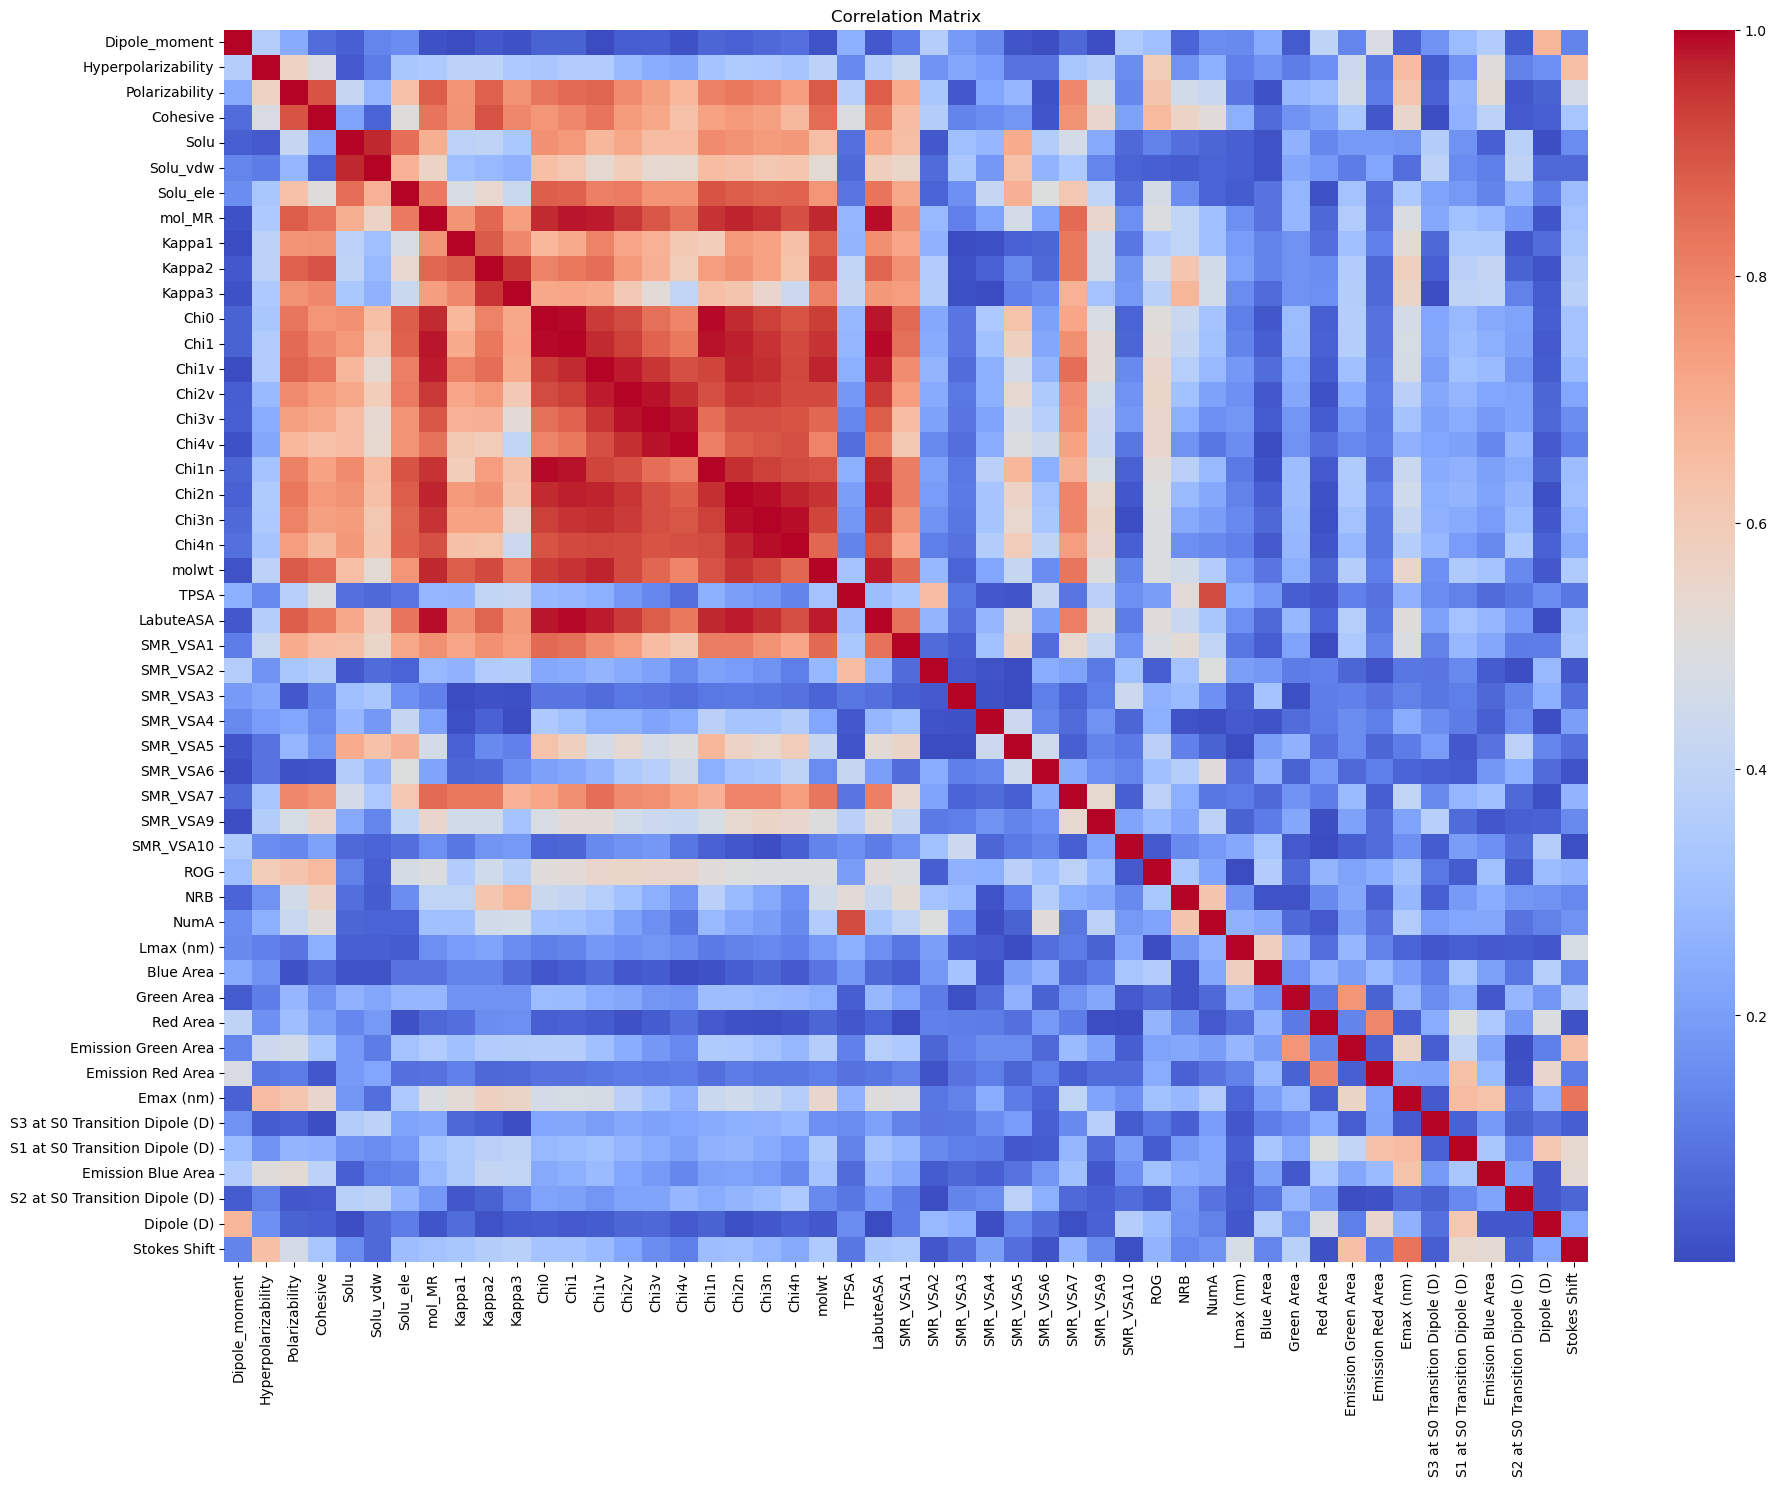

Highly correlated features dropped.


In [40]:
#drop higgly correlated features
if len(X.columns) > 2:
    correlation_matrix = X.corr().abs()

    # Find and print pairs of highly correlated features with names and values
    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    correlated_pairs = []

    for column in upper.columns:
        correlated_features = [index for index, value in upper[column].items() if value > 0.8]
        for feature in correlated_features:
            correlated_pairs.append((column, feature))

    print("Groups of highly correlated features:")
    for pair in correlated_pairs:
        feature1_name = pair[0]
        feature2_name = pair[1]
        correlation_value = correlation_matrix.loc[feature1_name, feature2_name]
        print(f"{feature1_name} and {feature2_name} have correlation value: {correlation_value}")

    plt.figure(figsize=(22, 16))
    sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

    # Drop highly correlated features in X_train
    to_drop_indices = [column for column in upper.columns if any(upper[column] > 0.8)]
    X = X.drop(to_drop_indices, axis=1)

    # Drop the same correlated features from X_test
#     X_test = X_test.drop(to_drop_indices, axis=1)


    print("Highly correlated features dropped.")
else:
    print("Not enough features remaining after variance thresholding.")
# x_train = pd.concat([X_test, X_train], ignore_index=True)


### Groups of highly correlated features:
Pairs of highly correlated features:

Cohesive and Polarizability have correlation value: 0.8825312210099565

Solu_vdw and Solu have correlation value: 0.9739314923791234

Solu_ele and Solu have correlation value: 0.8667925272575809

mol_MR and Polarizability have correlation value: 0.8662555299400536

mol_MR and Cohesive have correlation value: 0.8165490847511612

mol_MR and Solu_ele have correlation value: 0.8912359279637597

Kappa1 and mol_MR have correlation value: 0.8209075743120156

Kappa2 and Polarizability have correlation value: 0.8606790458761767

Kappa2 and Cohesive have correlation value: 0.8930048836420327

Kappa2 and mol_MR have correlation value: 0.8693243266048449

Kappa2 and Kappa1 have correlation value: 0.8899943231786255

Kappa3 and Kappa2 have correlation value: 0.9416277425442143

Chi0 and Polarizability have correlation value: 0.8278492854653897

Chi0 and Solu_ele have correlation value: 0.9262163608577438

Chi0 and mol_MR have correlation value: 0.9654309710336532

Chi0 and Kappa2 have correlation value: 0.8232777693602299

Chi1 and Polarizability have correlation value: 0.8493873931037796

Chi1 and Solu_ele have correlation value: 0.921970942446706

Chi1 and mol_MR have correlation value: 0.9843579111845607

Chi1 and Kappa2 have correlation value: 0.8445401507094605

Chi1 and Chi0 have correlation value: 0.9953894234381986

Chi1v and Polarizability have correlation value: 0.8477824033492087

Chi1v and Cohesive have correlation value: 0.8149500808671664

Chi1v and Solu_ele have correlation value: 0.8751361360030585

Chi1v and mol_MR have correlation value: 0.9815579226798062

Chi1v and Kappa1 have correlation value: 0.8398136697704915

Chi1v and Kappa2 have correlation value: 0.8448886702157874

Chi1v and Chi0 have correlation value: 0.9441073334030399

Chi1v and Chi1 have correlation value: 0.9663611635891866

Chi2v and Solu_ele have correlation value: 0.8740313939050993

Chi2v and mol_MR have correlation value: 0.9413401281802365

Chi2v and Chi0 have correlation value: 0.9145033847169568

Chi2v and Chi1 have correlation value: 0.9313899119313385

Chi2v and Chi1v have correlation value: 0.9783733302985028

Chi3v and Solu_ele have correlation value: 0.8126323082056675

Chi3v and mol_MR have correlation value: 0.8951079306464389

Chi3v and Chi0 have correlation value: 0.8468579910896227

Chi3v and Chi1 have correlation value: 0.8716782379399178

Chi3v and Chi1v have correlation value: 0.9500647042671754

Chi3v and Chi2v have correlation value: 0.9856340412352813

Chi4v and mol_MR have correlation value: 0.8554174083734334

Chi4v and Chi0 have correlation value: 0.8106195833974484

Chi4v and Chi1 have correlation value: 0.8362513213105782

Chi4v and Chi1v have correlation value: 0.9184017841538

Chi4v and Chi2v have correlation value: 0.9647757702290568

Chi4v and Chi3v have correlation value: 0.990152142141153

Chi1n and Polarizability have correlation value: 0.8086519158316473

Chi1n and Solu have correlation value: 0.8059668825438955

Chi1n and Solu_ele have correlation value: 0.9394893412498436

Chi1n and mol_MR have correlation value: 0.9572022087510854

Chi1n and Chi0 have correlation value: 0.9955437885931787

Chi1n and Chi1 have correlation value: 0.9899591851496902

Chi1n and Chi1v have correlation value: 0.9367719723456891

Chi1n and Chi2v have correlation value: 0.9154855196786619

Chi1n and Chi3v have correlation value: 0.8513121110006889

Chi1n and Chi4v have correlation value: 0.8210968552329019

Chi2n and Polarizability have correlation value: 0.8251925219248066

Chi2n and Solu_ele have correlation value: 0.9146438637364585

Chi2n and mol_MR have correlation value: 0.974396868567769

Chi2n and Kappa1 have correlation value: 0.8039931571804821

Chi2n and Chi0 have correlation value: 0.9603341562585508

Chi2n and Chi1 have correlation value: 0.9763527761965175

Chi2n and Chi1v have correlation value: 0.9762107528424299

Chi2n and Chi2v have correlation value: 0.9483333805108323

Chi2n and Chi3v have correlation value: 0.9039012642090742

Chi2n and Chi4v have correlation value: 0.8822779940331015

Chi2n and Chi1n have correlation value: 0.9587858034233706

Chi3n and Polarizability have correlation value: 0.8094826919089959

Chi3n and Solu_ele have correlation value: 0.891716549756895

Chi3n and mol_MR have correlation value: 0.958398778658127

Chi3n and Chi0 have correlation value: 0.9317146038023861

Chi3n and Chi1 have correlation value: 0.9535674636565865

Chi3n and Chi1v have correlation value: 0.9668711598381707

Chi3n and Chi2v have correlation value: 0.9382285530463352

Chi3n and Chi3v have correlation value: 0.9076324709741135

Chi3n and Chi4v have correlation value: 0.8934863684892891

Chi3n and Chi1n have correlation value: 0.9346913335144807

Chi3n and Chi2n have correlation value: 0.992850637641122

Chi4n and Solu_ele have correlation value: 0.8878607747055679

Chi4n and mol_MR have correlation value: 0.9250036971963891

Chi4n and Chi0 have correlation value: 0.9052226227180736

Chi4n and Chi1 have correlation value: 0.9256714099102907

Chi4n and Chi1v have correlation value: 0.9403348842296814

Chi4n and Chi2v have correlation value: 0.9245900868347771

Chi4n and Chi3v have correlation value: 0.9009254915925874

Chi4n and Chi4v have correlation value: 0.9009936240161064

Chi4n and Chi1n have correlation value: 0.9168465096096374

Chi4n and Chi2n have correlation value: 0.9777444864059146

Chi4n and Chi3n have correlation value: 0.9923953643407274

molwt and Polarizability have correlation value: 0.8787545451398496

molwt and Cohesive have correlation value: 0.8405129927133133

molwt and Solu_ele have correlation value: 0.8434008158872468

molwt and mol_MR have correlation value: 0.9755415622213383

molwt and Kappa1 have correlation value: 0.8962880712799899

molwt and Kappa2 have correlation value: 0.9100799692546241

molwt and Chi0 have correlation value: 0.9497745660820006

molwt and Chi1 have correlation value: 0.9672608895858505

molwt and Chi1v have correlation value: 0.9744626164533853

molwt and Chi2v have correlation value: 0.9209270598557346

molwt and Chi3v have correlation value: 0.8715146440190122

molwt and Chi4v have correlation value: 0.8275969190717126

molwt and Chi1n have correlation value: 0.9267848693752662

molwt and Chi2n have correlation value: 0.9647783403807723

molwt and Chi3n have correlation value: 0.9459621571889867

molwt and Chi4n have correlation value: 0.9044056165764329

LabuteASA and Polarizability have correlation value: 0.8696961724701635

LabuteASA and Cohesive have correlation value: 0.8143368522250919

LabuteASA and Solu_ele have correlation value: 0.8998275402842936

LabuteASA and mol_MR have correlation value: 0.9921854300275573

LabuteASA and Kappa1 have correlation value: 0.8178565387983511

LabuteASA and Kappa2 have correlation value: 0.8706204980785887

LabuteASA and Chi0 have correlation value: 0.9839979730422993

LabuteASA and Chi1 have correlation value: 0.994965925799197

LabuteASA and Chi1v have correlation value: 0.9788624669614251

LabuteASA and Chi2v have correlation value: 0.9365439754289795

LabuteASA and Chi3v have correlation value: 0.8818473649185172

LabuteASA and Chi4v have correlation value: 0.8429530000992843

LabuteASA and Chi1n have correlation value: 0.973711894449769

LabuteASA and Chi2n have correlation value: 0.98155295350186

LabuteASA and Chi3n have correlation value: 0.961930057235826

LabuteASA and Chi4n have correlation value: 0.9298033107874697

LabuteASA and molwt have correlation value: 0.9859115595275595

SMR_VSA1 and mol_MR have correlation value: 0.8195098479105483

SMR_VSA1 and Kappa2 have correlation value: 0.8124233308914277

SMR_VSA1 and Chi0 have correlation value: 0.9008393799119075

SMR_VSA1 and Chi1 have correlation value: 0.8841246316264575

SMR_VSA1 and Chi1v have correlation value: 0.8198962095395762

SMR_VSA1 and Chi1n have correlation value: 0.870436918949699

SMR_VSA1 and Chi2n have correlation value: 0.8393018492879778

SMR_VSA1 and molwt have correlation value: 0.8844231221872584

SMR_VSA1 and LabuteASA have correlation value: 0.8752776425197949

SMR_VSA7 and mol_MR have correlation value: 0.8528360402058041

SMR_VSA7 and Kappa1 have correlation value: 0.8756197351107414

SMR_VSA7 and Kappa2 have correlation value: 0.8236155817560458

SMR_VSA7 and Chi1v have correlation value: 0.8419768717756092

SMR_VSA7 and Chi2n have correlation value: 0.800223166512909

SMR_VSA7 and Chi3n have correlation value: 0.8006212367308994

SMR_VSA7 and molwt have correlation value: 0.8324279601158401

SMR_VSA7 and LabuteASA have correlation value: 0.8067909811660399

NumA and TPSA have correlation value: 0.892116315349867

Emission Red Area and Red Area have correlation value: 0.8229408630471566

Stokes Shift and Emax (nm) have correlation value: 0.818266444677796

### As we can see following  features or Columns, have been dropped due to higly correlation:
Cohesive, 
Polarizability, 
Stokes Shift, 
Emax (nm), 
Emission Red Area, 
Red Area, 
NumA, 
TPSA, 
SMR_VSA7, 
Chi3n, 
Chi2n, 
Chi1v, 
Kappa2, 
Kappa1, 
mol_MR, 
SMR_VSA1, 
LabuteASA, 
molwt, 
Chi4n, 
Chi4v, 
Chi3v, 
Chi2v, 
Chi0 

In [41]:
#Now check how many columns in the data
print("the shape of x is: ", X.shape)


the shape of x is:  (136, 27)


As from the above information columns have been droped from 49 to 27.                                                     So 22 columns have been droped out on the basis of high correlation.

### Outliear Removing

In [42]:
# Outliear Removing
Q1 = np.percentile(X, 25, axis=0)
Q3 = np.percentile(X, 75, axis=0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mask = np.all((X >= lower_bound) & (X <= upper_bound), axis=1)
X = X[mask]
y = y[mask]

In [57]:
# Instantiate SMOTE
import pandas as pd
from imblearn.over_sampling import SMOTE
np.random.seed(42)
# Specify the number of synthetic samples you want to generate
num_synthetic_samples = 68

# Generate synthetic data by adding random noise to the original data
X_synthetic = X + np.random.normal(0, 0.1, size=(num_synthetic_samples, X.shape[1]))
y_synthetic = y + np.random.normal(0, 0.1, size=num_synthetic_samples)

# Concatenate the original data with the synthetic data
x_combined = pd.concat([X, pd.DataFrame(X_synthetic, columns=X.columns)])
y_combined = pd.concat([y, pd.Series(y_synthetic)])


In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Perform the standard scaling on the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_combined)


### Data Split into Test Train Set

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X_train_scaled, y_combined, test_size=0.2, random_state=42)

## Use Deep Learning Linear Regresion Model

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Create a neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=1, activation='linear'))

# Compile the model with the Adam optimizer and learning rate decay
from tensorflow.keras.optimizers.legacy import Adam

# Compile the model with the Adam optimizer and learning rate decay
model.compile(optimizer=Adam(learning_rate=1e-3, decay=1e-3/200), loss='mean_squared_error')

# Train the model on the training data
model.fit(x_train, y_train, epochs=3000, batch_size=32, verbose=1)



Epoch 1/3000
4/4 [==============================] - 0s 3ms/step - loss: 10984.5322
Epoch 2/3000
4/4 [==============================] - 0s 3ms/step - loss: 10942.2148
Epoch 3/3000
4/4 [==============================] - 0s 5ms/step - loss: 10903.9697
Epoch 4/3000
4/4 [==============================] - 0s 7ms/step - loss: 10863.9795
Epoch 5/3000
4/4 [==============================] - 0s 5ms/step - loss: 10824.1934
Epoch 6/3000
4/4 [==============================] - 0s 8ms/step - loss: 10786.0957
Epoch 7/3000
4/4 [==============================] - 0s 7ms/step - loss: 10746.2109
Epoch 8/3000
4/4 [==============================] - 0s 9ms/step - loss: 10705.4307
Epoch 9/3000
4/4 [==============================] - 0s 6ms/step - loss: 10665.2207
Epoch 10/3000
4/4 [==============================] - 0s 7ms/step - loss: 10623.7539
Epoch 11/3000
4/4 [==============================] - 0s 7ms/step - loss: 10581.7627
Epoch 12/3000
4/4 [==============================] - 0s 8ms/step - loss: 10539.5664
E

## R2 and RMSE Value

In [61]:
# predictions for x test
predictions = model.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Calculate R-squared
r2 = r2_score(y_test, predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("R-squared:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

1/1 [==============================] - 0s 58ms/step
R-squared: 0.8355154983682365
Root Mean Squared Error (RMSE): 11.931827098223527


### Interpretation of R-Squared and RMSE
R-squared (R²):
Measures: The proportion of variance in the target variable that is explained by the model's predictors.
Range: 0 to 1, with higher values indicating better fit.
General benchmarks:
    0.7 or higher is considered good
    0.5 to 0.7 is moderate
    Below 0.5 is often considered poor
  
  In our model R-squared (R²) is 0.84, which is very good.  
    

Root Mean Squared Error (RMSE):

Measures: The average magnitude of the errors in predictions (differences between predicted and actual values).
Units: Same as the target variable.
Lower values: Indicate better accuracy.

Rule of thumb: RMSE within 10-20% of the target variable's standard deviation might be acceptable.
 
 In our model RMSE is 11%, which is in acceptable range

## Visuals of Output

## Scattered Plot for Actual Vs Predicted Values

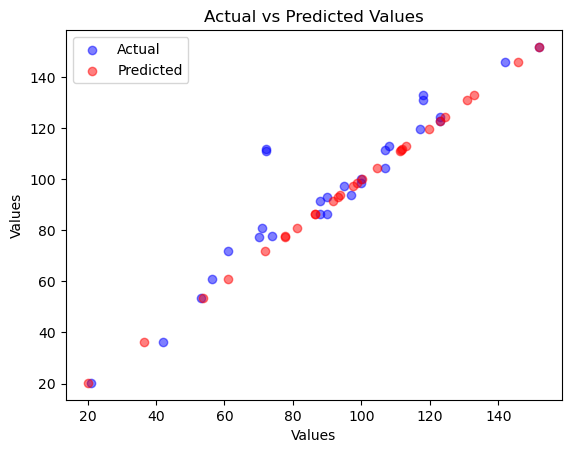

In [62]:
# Scatter plot with different colors for actual and predicted values
plt.scatter(y_test, predictions, alpha=0.5, color='blue', label='Actual')
plt.scatter(predictions, predictions, alpha=0.5, color='red', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Values')
plt.legend()
plt.show()


### Scatter Plot Explanation

The above graphs represtes blue dots for our predicted values and red crosses for actual values. From the graph it can be seen that same trend is followed by predicted values as followed by actual values. However, there is a small deviation between actual values and predicted values as no predicting model can be ideal.